## Module 3 Project Submission

* Student name: Alice Kwon
* Student pace: part time
* Instructor name: Eli Thomas

This data has been taken from Kaggle. 

### Data Dictionary :
1. age: in years  
2. sex: 1 = male, 0 = female
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalac: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 2 = normal; 1 = fixed defect; 3 = reversable defect
14. target: 1 or 0, 0 = yes, 1 = no

Note: as a student and a beginner this project is made more extensive than it would be otherwise if this were a real project for a data scientist. We try to explain the steps and thought process of how a beginner/student of data science may go about trying to classify heart disease patients using this dataset. Additionally, it is encouraged to write these models from scratch. Therefore at the end of the notebook we will use models that have been written from scratch with the associated python files. We do not test the naive bayes model, here but the python file can be found in the git repository.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('hearts.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Cleaning Data

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We had to do some digging around to find out that 1 means you have heart disease and 0 means you do not have heart disease. Which is unusual notation. One may skip this step but we will change 0s to 1s and 1s to 0s to indicate that 1 means you have heart disease and 0 means you do not have heart disease. 

In [3]:
def switch(value):
    if value == 0:
        return 1
    elif value == 1:
        return 0
df.target = df.target.apply(lambda x: switch(x))

### Handling Categorical data
We replace all numeric values into string toe describe which each numerical value represents. Then change these variables into categorical values. 

- thal: description of values in data dictionary. 
- cp: chest pain type from 0-3 describes symptoms of anginal pain.
- restecg: The resting ECG is a simple, quick and painless test. The resting ECG can detect certain heart conditions such as hypertrophy of heart, ischemia, myocardial infarction, sequelae of myocardial infarction, cardiac arrhythmias, etc. 
- slope: We take this to indicate type of slope from S-T segment more can be found https://litfl.com/st-segment-ecg-library/
- we take Male and Female to be separate categorical values. 

In [4]:
df['thal'] = df['thal'].replace(1, 'fixed defect')
df['thal'] = df['thal'].replace(2, 'normal')
df['thal'] = df['thal'].replace(3, 'reversable defect')
df['cp'] = df['cp'].replace(0, 'asymptomatic')
df['cp'] = df['cp'].replace(1, 'atypical angina')
df['cp'] = df['cp'].replace(2, 'non-anginal pain')
df['cp'] = df['cp'].replace(3, 'typical angina')
df['restecg'] = df['restecg'].replace(0, 'ventricular hypertrophy')
df['restecg'] = df['restecg'].replace(1, 'normal')
df['restecg'] = df['restecg'].replace(2, 'ST-T wave abnormality')
df['slope'] = df['slope'].replace(0, 'downsloping')
df['slope'] = df['slope'].replace(1, 'flat')
df['slope'] = df['slope'].replace(2, 'upsloping')

In [5]:
temp = pd.get_dummies(df[['cp', 'restecg', 'slope', 'thal']])
df = df.join(temp, how='left')
df = df.drop(columns = ['cp','restecg', 'slope', 'thal'], axis=1)

In [6]:
df = df.drop(['thal_0'], axis=1)

### Drop duplicates

In [7]:
df = df.drop_duplicates()

### Multicolinearity
We check to see if there are correlations. 

In [10]:
df.corr()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_typical angina,restecg_ST-T wave abnormality,restecg_normal,restecg_ventricular hypertrophy,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.398522,0.096801,0.210013,0.276326,0.225439,...,0.047516,0.084621,-0.160654,0.141398,0.030536,0.177201,-0.192580,0.063758,-0.135891,0.110752
sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.044020,0.141664,0.096093,0.118261,0.280937,...,0.088043,-0.107689,-0.011940,0.036539,0.046183,-0.009157,-0.014356,0.141135,-0.376365,0.321559
trestbps,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.046698,0.067616,0.193216,0.101389,0.144931,...,0.151343,0.058635,-0.146576,0.133249,0.122384,0.025207,-0.087472,0.076369,-0.140712,0.109573
chol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.009940,0.067023,0.053952,0.070511,0.085239,...,-0.050589,0.034615,-0.174394,0.166565,-0.045340,0.051177,-0.028054,-0.093560,-0.004591,0.059621
fbs,0.121308,0.045032,0.177531,0.013294,1.000000,-0.008567,0.025665,0.005747,0.137979,0.028046,...,0.055511,-0.048305,-0.066344,0.077405,0.105284,-0.033360,-0.020255,0.091351,-0.086774,0.030953
thalach,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,1.000000,-0.378812,-0.344187,-0.213177,-0.421741,...,0.079082,-0.120870,0.101512,-0.073953,-0.056590,-0.419627,0.448043,-0.159748,0.294801,-0.215417
exang,0.096801,0.141664,0.067616,0.067023,0.025665,-0.378812,1.000000,0.288223,0.115739,0.436757,...,-0.093384,0.042729,-0.093776,0.084059,0.059253,0.257687,-0.287606,0.063073,-0.328539,0.300223
oldpeak,0.210013,0.096093,0.193216,0.053952,0.005747,-0.344187,0.288223,1.000000,0.222682,0.430696,...,0.086959,0.168172,-0.138486,0.100141,0.394253,0.310986,-0.511356,0.104635,-0.339086,0.302145
ca,0.276326,0.118261,0.101389,0.070511,0.137979,-0.213177,0.115739,0.222682,1.000000,0.391724,...,-0.070496,0.030660,-0.089642,0.082679,-0.042218,0.141923,-0.120306,0.066618,-0.221331,0.203601
target,0.225439,0.280937,0.144931,0.085239,0.028046,-0.421741,0.436757,0.430696,0.391724,1.000000,...,-0.086957,0.068410,-0.175322,0.159775,0.063554,0.362053,-0.394066,0.106589,-0.527334,0.486112


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

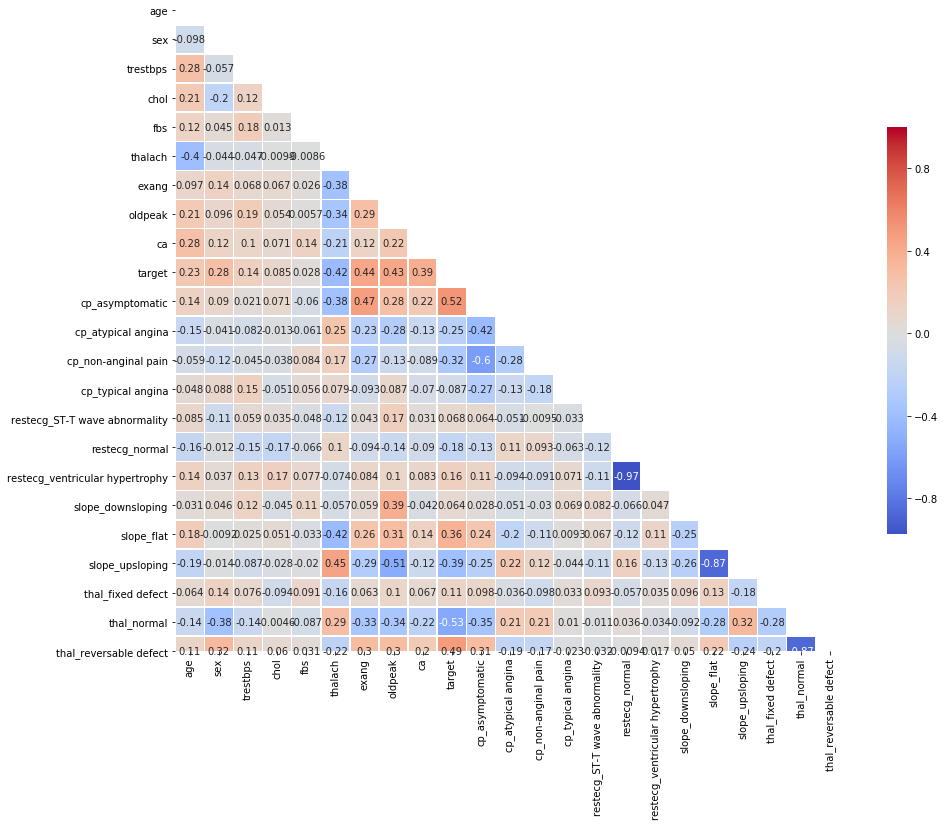

In [12]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

### Exploring the data

We begin by looking for the age group with largest number of heart disease. For each age group we also want to see how other components like resting blood pressure, cholesterol etc., determinme heart disease, i.e. who are at risk of heart disease? 

<br>Note: trestbps = 120, chol <200, thalac = 220 - age is considered ideal for healthy adults.  

/Users/alicekwon/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


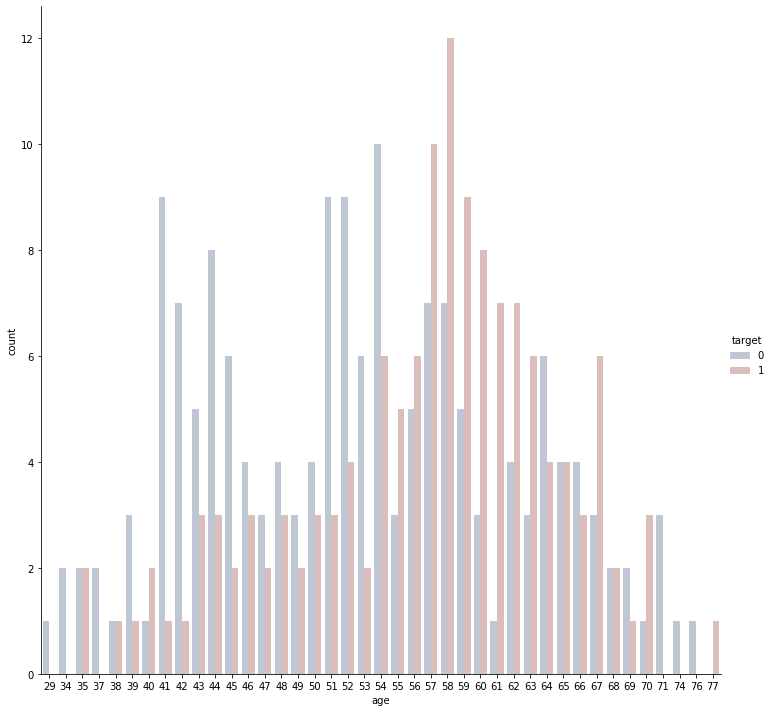

In [9]:
sns.factorplot('age', kind='count', hue='target', data=df, palette = 'vlag', height=10, aspect=1.0)
plt.savefig('age_gender.png')

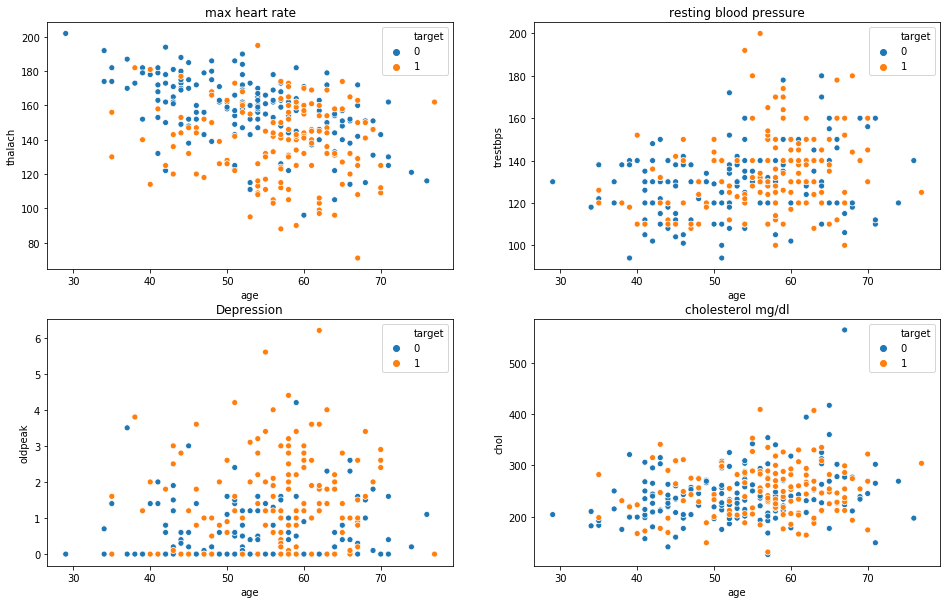

In [14]:
plt.figure(figsize=(16,10))

plt.subplot(221)
sns.scatterplot(x=df.age,y= df.thalach ,hue= df.target)
plt.xlabel('age')
plt.ylabel('thalach')
plt.title('max heart rate')

plt.subplot(222)
sns.scatterplot(x=df.age, y= df.trestbps ,hue= df.target)
plt.xlabel('age')
plt.ylabel('trestbps')
plt.title('resting blood pressure')

plt.subplot(223)
sns.scatterplot(x= df.age, y= df.oldpeak ,hue= df.target)
plt.xlabel('age')
plt.ylabel('oldpeak')
plt.title('Depression')

plt.subplot(224)
sns.scatterplot(x= df.age, y= df.chol ,hue= df.target)
plt.xlabel('age')
plt.ylabel('chol')
plt.title('cholesterol mg/dl')

plt.savefig('age.png')
plt.show()

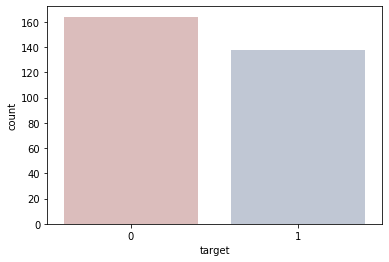

In [10]:
sns.countplot(df.target, palette = 'vlag_r')
df.target.value_counts()
plt.savefig('target1.png')

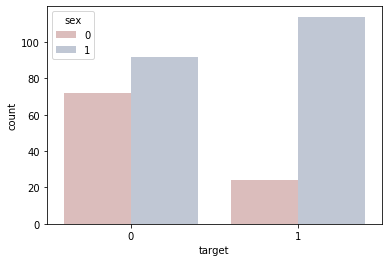

In [11]:
sns.countplot(df.target, hue = df.sex, palette = 'vlag_r')
plt.savefig('target2.png')

We see that females are more prone to heart disease than their male counterparts. 

### Checking for outliers
We remove some outliers, but as every patient is different we don't remove all outliers just ones that are extreme.  

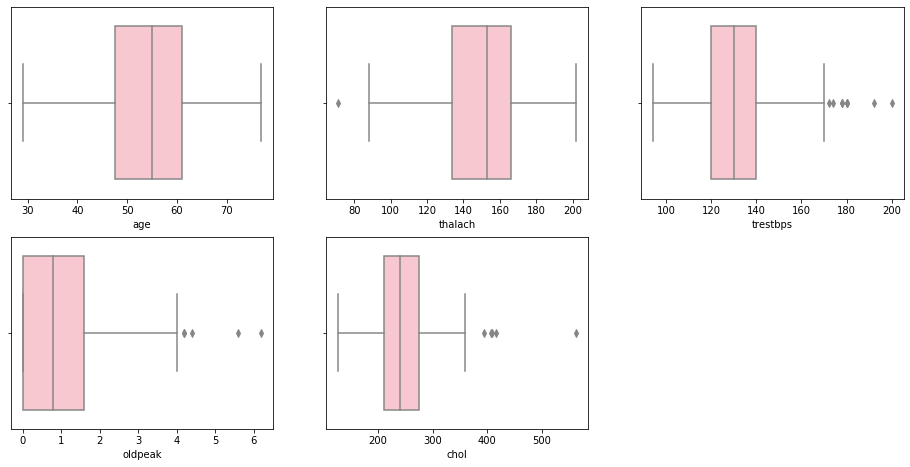

In [17]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.age, color = 'pink')
plt.subplot(332)
sns.boxplot(df.thalach, color = 'pink')
plt.subplot(333)
sns.boxplot(df.trestbps, color = 'pink')
plt.subplot(334)
sns.boxplot(df.oldpeak, color = 'pink')
plt.subplot(335)
sns.boxplot(df.chol, color = 'pink')


In [9]:
df = df[df['trestbps'] < 180]
df = df[df['oldpeak'] < 5]
df = df[df['chol'] < 450]
df = df[df['thalach'] > 80]

We decide not to consider age as a categorical value. What we will do is add a random fractional part so that age is altered as year + some fraction of a year. For example if a person is 47 years old we add fractional part (at random) say .67 to say this person is 47.67 years old, this will translate to 47 years + 67th of a year old. 

To do this we make the assumption that being a few months off by age does not make a difference with heart disease as our data set contains adults above 29 years old and are not in developing years (0-18) where a few months can make a significant difference. This will allow us to consider age as continuous data as opposed to categorical data.   

In [13]:
df.age.min()

29

In [10]:
def add_fractional_part(value):
    x = np.random.uniform(0,1)
    return round(value + x, 2)

In [11]:
df.age = df.age.apply(lambda x: add_fractional_part(x))

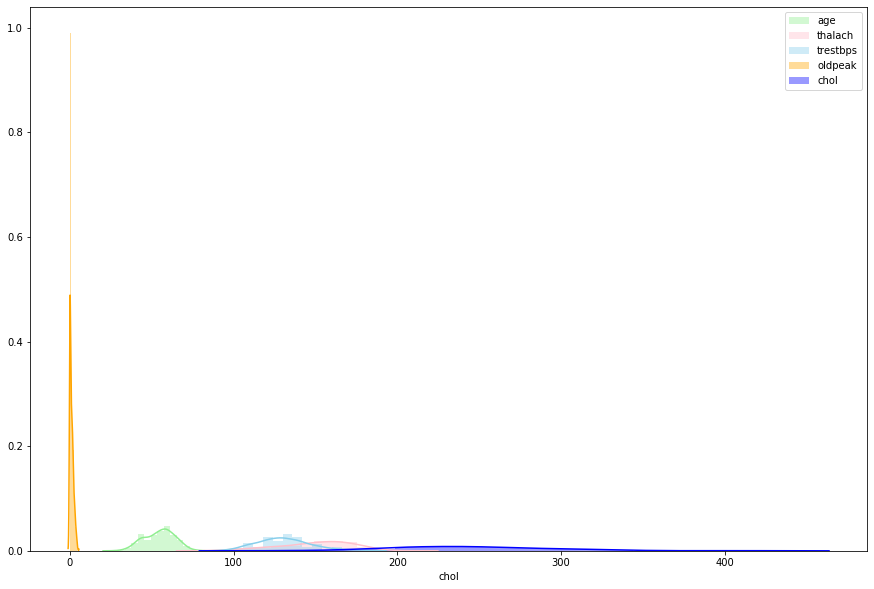

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(df.age, label='age', color = 'lightgreen')
sns.distplot(df.thalach, label='thalach', color = 'pink')
sns.distplot(df.trestbps, label='trestbps', color = 'skyblue')
sns.distplot(df.oldpeak, label='oldpeak', color = 'orange')
sns.distplot(df.chol, label='chol', color = 'blue')


plt.legend()
plt.show()

In [12]:
df.age = ( df.age - df.age.min() ) / ( df.age.max() - df.age.min() )
df.thalach = ( df.thalach - df.thalach.min() ) / ( df.thalach.max() - df.thalach.min())
df.trestbps = ( df.trestbps - df.trestbps.min() ) / ( df.trestbps.max() - df.trestbps.min())
df.oldpeak = ( df.oldpeak - df.oldpeak.min() ) / ( df.oldpeak.max() - df.oldpeak.min() )
df.chol = ( df.chol - df.chol.min() ) / ( df.chol.max() - df.chol.min())


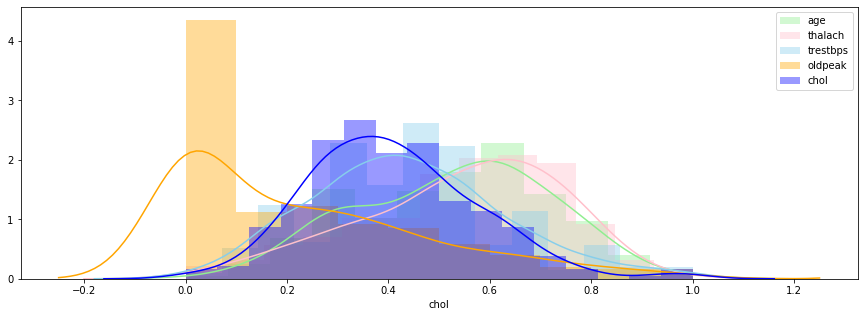

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(df.age, label='age', color = 'lightgreen')
sns.distplot(df.thalach, label='thalach', color = 'pink')
sns.distplot(df.trestbps, label='trestbps', color = 'skyblue')
sns.distplot(df.oldpeak, label='oldpeak', color = 'orange')
sns.distplot(df.chol, label='chol', color = 'blue')


plt.legend()
plt.show()

## Implementing models:
For this project we will be implementing several different models to make predictions:
- Logistic regression
- KNN
- Decision trees
- random forrest
- naive bayes
- ensemble 
- xgboost 
- adaboost 

Use the help function to see the parameters and returns of functions in the py file. 

We will care about our recall and accuracy scores.
The recall answers: of all the patients that truly had heart disease how many of them did we label? This is important because we do not want to identify a patient with heart disease as not having heart disease. This is less harmful than identifying a patient without heart disease as having heart disease. 

However, if given a low accuracy score and a high recall score this may mean that our model has label most patients as having heart disease which is not what we want either... hence one should be cautious that although we care about recall we still want to take into consideration the accuracy score. 

## Logistic Regression

In [13]:
import mystats as ms
import warnings
warnings.filterwarnings('ignore')

We want to check for perfect separators and make sure that all our independent variables are not perfect separators for the dependant variable. 

In [26]:
perf_sep = []
list_of_var = list(df.drop('target', axis =1).columns)
for var in list_of_var:
    perf_sep.append((var, ms.perfect_separation_indicator(df,var,'target')))

perf_sep

[('age', False),
 ('sex', False),
 ('trestbps', False),
 ('chol', False),
 ('fbs', False),
 ('thalach', False),
 ('exang', False),
 ('oldpeak', False),
 ('ca', False),
 ('cp_asymptomatic', False),
 ('cp_atypical angina', False),
 ('cp_non-anginal pain', False),
 ('cp_typical angina', False),
 ('restecg_ST-T wave abnormality', False),
 ('restecg_normal', False),
 ('restecg_ventricular hypertrophy', False),
 ('slope_downsloping', False),
 ('slope_flat', False),
 ('slope_upsloping', False),
 ('thal_fixed defect', False),
 ('thal_normal', False),
 ('thal_reversable defect', False)]

Since all variables have returned false that means that none are perfect separators. We move onto the next step to check if our Hessian is invertible. If our Hessian is not invertible we will get some nan values in our stats summary for logistic regression. 

In [27]:
ms.stats_invertible(df, 'target')

Optimization terminated successfully.
         Current function value: 0.336055
         Iterations 15


array([4.28679012e+13, 1.28564000e+00, 2.77461845e-01, 9.67272013e-01,
       1.74103750e+00, 3.29105309e-01, 1.66057867e+00, 1.87275597e-01,
       1.00065111e+00, 4.27401185e-02, 2.02385256e+14, 2.19986826e+14,
       2.23047772e+14, 2.00196791e+14, 2.17016292e+14, 2.17016292e+14,
       2.17016292e+14, 1.42360815e+15, 1.42360815e+15, 1.42360815e+15,
       5.19786193e+00, 4.81600664e+00, 4.84467257e+00])

In [28]:
ms.stats_logreg_summary(df, 'target')

Optimization terminated successfully.
         Current function value: 0.336055
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  294
Model:                          Logit   Df Residuals:                      274
Method:                           MLE   Df Model:                           19
Date:                Fri, 05 Jun 2020   Pseudo R-squ.:                  0.5110
Time:                        04:31:47   Log-Likelihood:                -98.800
converged:                       True   LL-Null:                       -202.04
Covariance Type:            nonrobust   LLR p-value:                 1.743e-33
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.9572   6.55e+06  -1.46e-07 

What we notice is there are some "bad" variables, namely: cp, restecg, slope. These variables have very high P-values which make them bad variables for this model. One may choose to drop these variables when using this model. 

In [66]:
y_hat_train, y_train, y_hat_test, y_test = ms.sklearn_logreg_predict(df, 'target', .3)

In [67]:
ms.correct_percentage(y_train, y_hat_train)

0    182
1     23
Name: target, dtype: int64
------------------------------------
0    0.887805
1    0.112195
Name: target, dtype: float64


In [68]:
ms.correct_percentage(y_test, y_hat_test)

0    71
1    17
Name: target, dtype: int64
------------------------------------
0    0.806818
1    0.193182
Name: target, dtype: float64


In [69]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.8928571428571429
Testing Precision:  0.8571428571428571
--------------------------------------------------------------------
Training Recall:  0.8426966292134831
Testing Recall:  0.7142857142857143
--------------------------------------------------------------------
Training Accuracy:  0.8878048780487805
Testing Accuracy:  0.8068181818181818
--------------------------------------------------------------------
Training F1-Score:  0.8670520231213873
Testing F1-Score:  0.7792207792207793


In [70]:
ms.tuning_threshold(df, 'target', .3)


******** For threshold = 0.05 ******
Our testing accuracy is:  0.6363636363636364
Our testing precision is:  0.5694444444444444
Our testing recall is:  0.9761904761904762
Our testing F1 score is:  0.7192982456140351
[[15 31]
 [ 1 41]]

******** For threshold = 0.1 ******
Our testing accuracy is:  0.6931818181818182
Our testing precision is:  0.6190476190476191
Our testing recall is:  0.9285714285714286
Our testing F1 score is:  0.742857142857143
[[22 24]
 [ 3 39]]

******** For threshold = 0.15 ******
Our testing accuracy is:  0.75
Our testing precision is:  0.6724137931034483
Our testing recall is:  0.9285714285714286
Our testing F1 score is:  0.78
[[27 19]
 [ 3 39]]

******** For threshold = 0.2 ******
Our testing accuracy is:  0.75
Our testing precision is:  0.6851851851851852
Our testing recall is:  0.8809523809523809
Our testing F1 score is:  0.7708333333333335
[[29 17]
 [ 5 37]]

******** For threshold = 0.25 ******
Our testing accuracy is:  0.7727272727272727
Our testing precis

0.5 - 0.6 is considered to be best threshold which is the default threshold (0.5)

## KNN 

We will use K-nearest neighbors to see how this model performs. Our data is quite close to normal so we wont use any scalers. We begin by looking for our best k depending on which score we find most important. As discussed before we believe that precision is most important but opinions may differ between specialists.  

In [71]:
X_train, X_test, y_train, y_test = ms.split(df, 'target', .3)

In [72]:
ms.find_best_k_f1(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

11

In [73]:
ms.find_best_k_accuracy(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

11

In [74]:
ms.find_best_k_precision(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

11

In [75]:
ms.find_best_k_recall(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

11

### K = 11
for all scores k=11 was considered to be best fit k.

In [76]:
y_hat_test, y_test, y_hat_train, y_train = ms.sklearn_knn_predictions(df, 'target', .3, 11)

In [77]:
ms.correct_percentage(y_train, y_hat_train)

0    180
1     25
Name: target, dtype: int64
------------------------------------
0    0.878049
1    0.121951
Name: target, dtype: float64


In [78]:
ms.correct_percentage(y_test, y_hat_test)

0    75
1    13
Name: target, dtype: int64
------------------------------------
0    0.852273
1    0.147727
Name: target, dtype: float64


In [79]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.8809523809523809
Testing Precision:  0.8536585365853658
--------------------------------------------------------------------
Training Recall:  0.8314606741573034
Testing Recall:  0.8333333333333334
--------------------------------------------------------------------
Training Accuracy:  0.8780487804878049
Testing Accuracy:  0.8522727272727273
--------------------------------------------------------------------
Training F1-Score:  0.8554913294797688
Testing F1-Score:  0.8433734939759037


In [80]:
ms.cnf_matrix(y_test, y_hat_test)

Confusion Matrix:
 [[40  6]
 [ 7 35]]


k =11 worked quite well with our accuracy and precision at over 85%. Our model is quite nice, we will not go ahead and use probability and look for thresholds.

## Decision Trees and Random Forrest

We will use decision trees and random forrest, however in practical use decision trees may not be the most reliable model for classification as random forrest. We are trying to classify hence we will not be using regressors.

### Decisiont Trees 

In [47]:
X_train, X_test, y_train, y_test = ms.split(df, 'target', .3)

In [48]:
y_hat_test, y_hat_train = ms.sklearn_dt_prediction(X_train, y_train, X_test)

In [49]:
ms.sklearn_AUC(y_test, y_hat_test)


AUC is :0.63


The higher the AUC the better, we may get better AUC when our training size is bigger but to avoid being overfit, we max at 80% 

In [20]:
X_train, X_test, y_train, y_test = ms.split(df, 'target', .25)

In [21]:
y_hat_test, y_hat_train = ms.sklearn_dt_prediction(X_train, y_train, X_test)

In [194]:
ms.sklearn_AUC(y_test, y_hat_test)


AUC is :0.74


We get a higher AUC we will stick to 25 test size

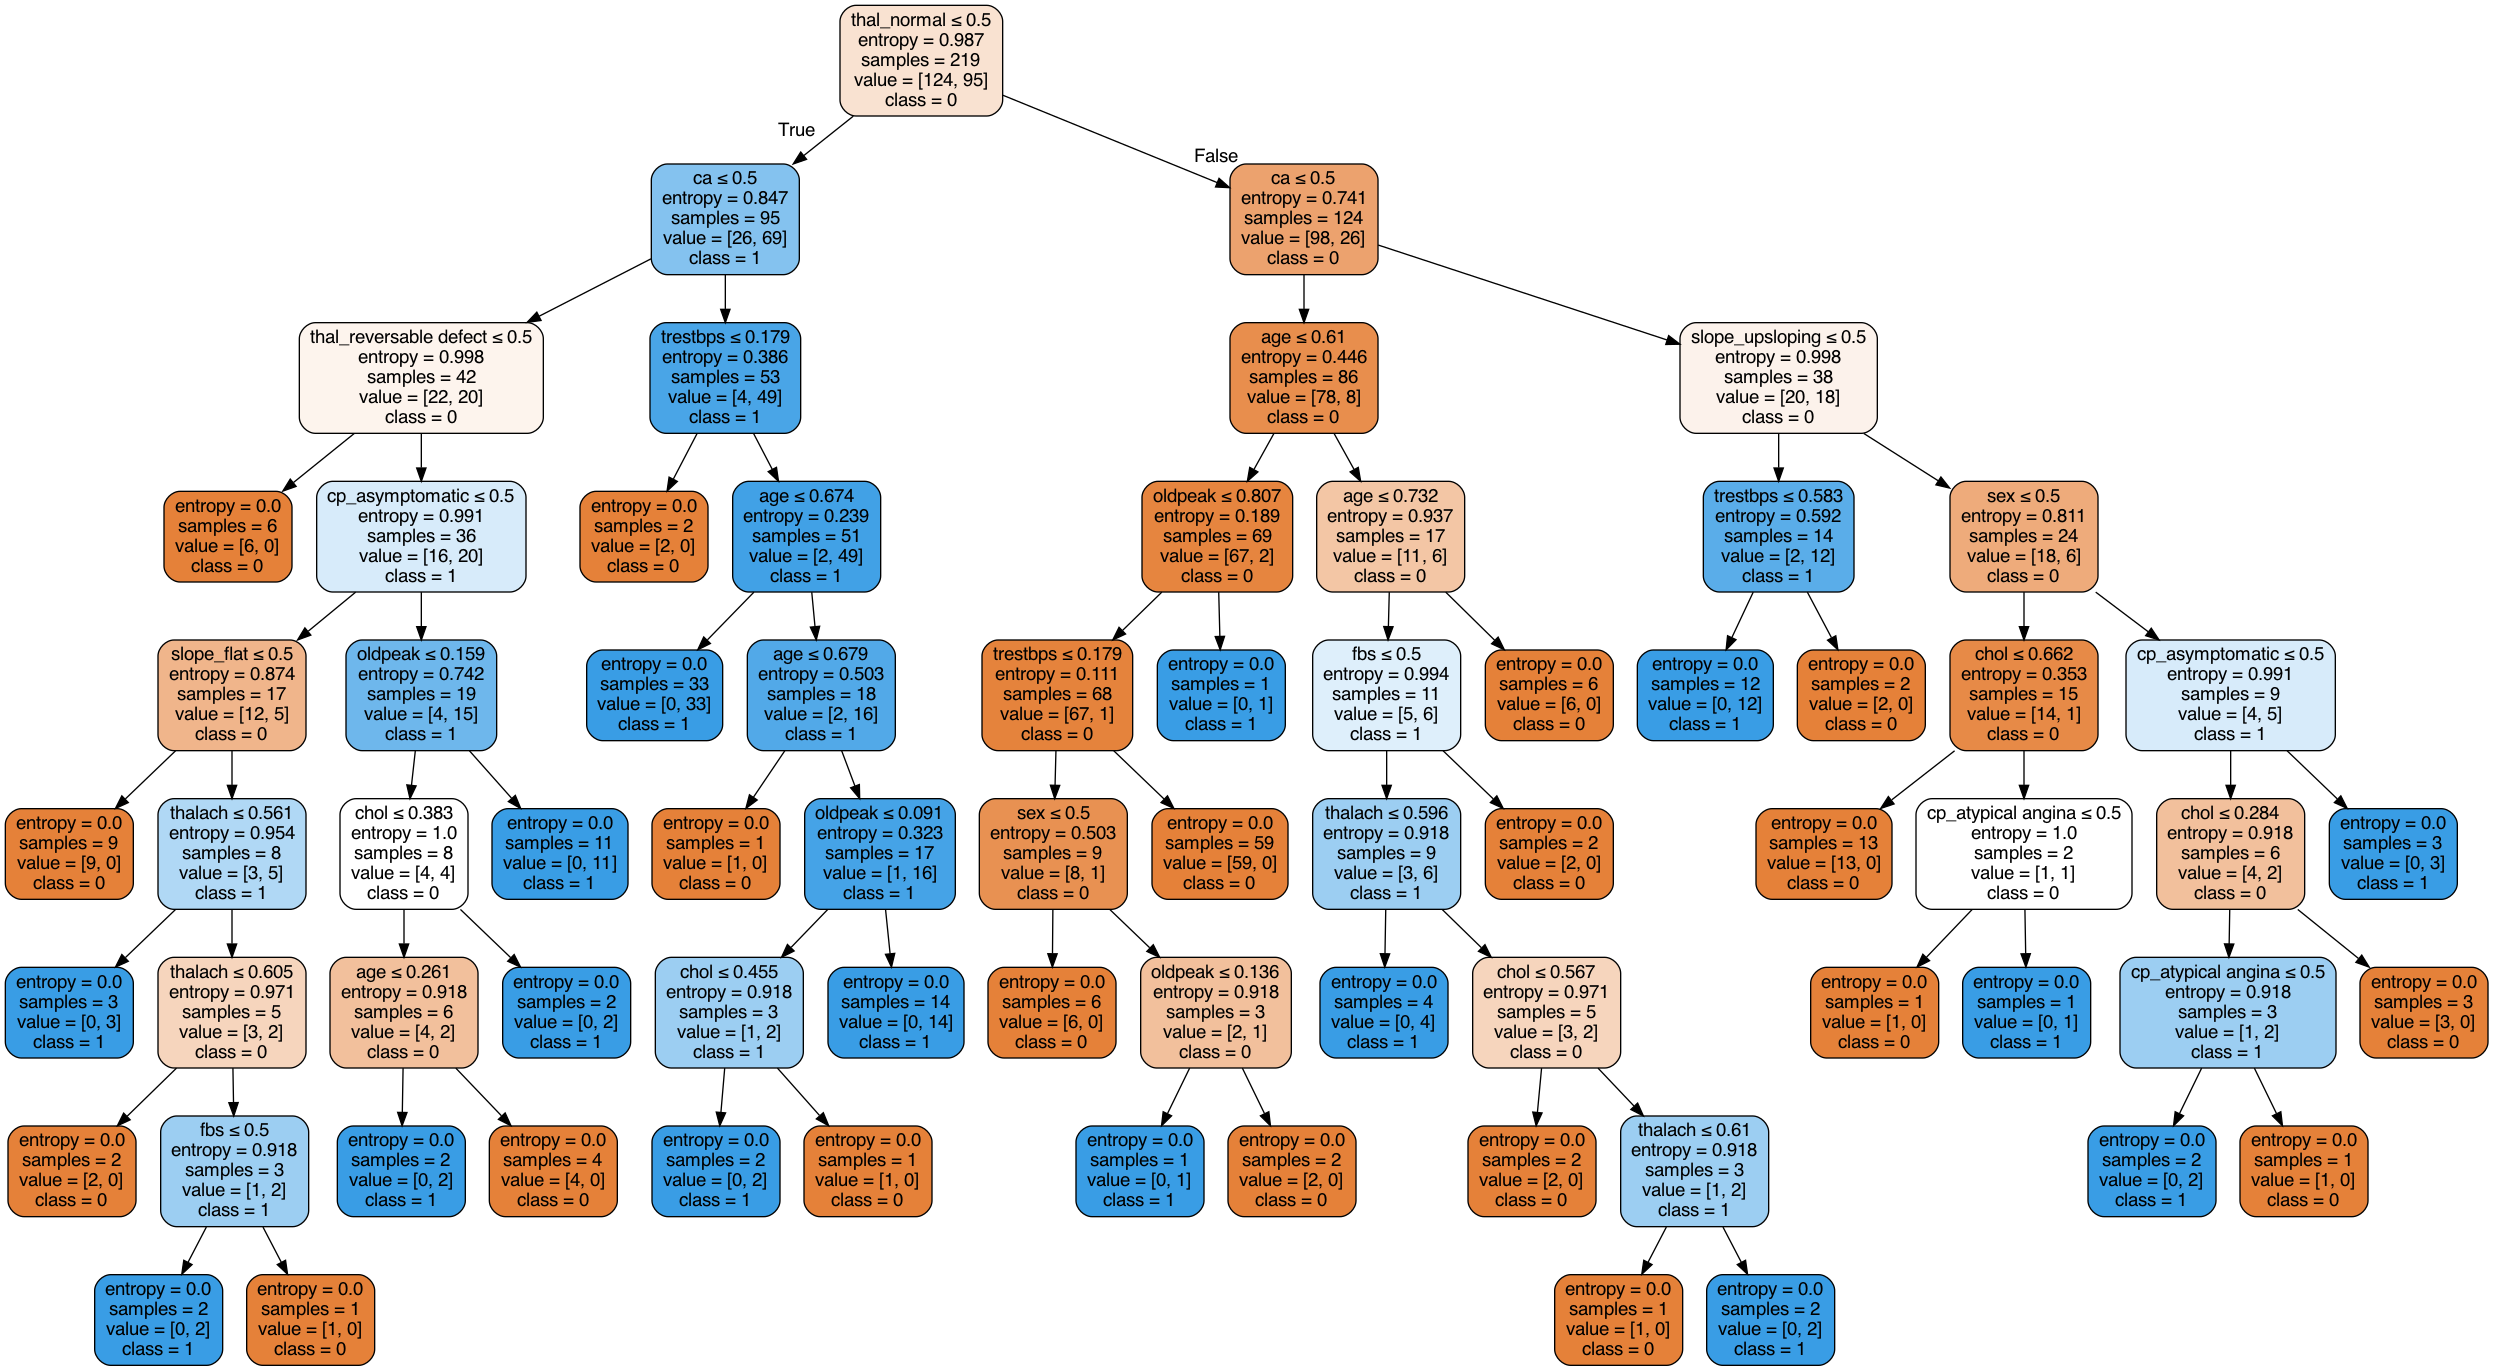

In [195]:
ms.tree(df, 'target', X_train, y_train)


In [196]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  1.0
Testing Precision:  0.7297297297297297
--------------------------------------------------------------------
Training Recall:  1.0
Testing Recall:  0.75
--------------------------------------------------------------------
Training Accuracy:  1.0
Testing Accuracy:  0.7432432432432432
--------------------------------------------------------------------
Training F1-Score:  1.0
Testing F1-Score:  0.7397260273972601


We see theres some overfitting, as training scores are perfect but our testing scores are not very good. We will fine tune the decision tree using maximum tree depth, minimum sample split, minimum sample leafs and maximum features. 

In [197]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results, test_results = ms.max_depth(max_depths, X_test, y_test, X_train, y_train)

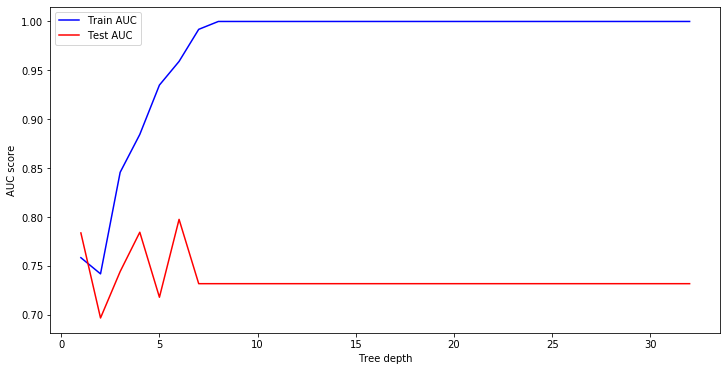

In [198]:
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

We see that after 4 our test decreases which may indicate overfitting, optimal value seen here is 3.

In [199]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results, test_results = ms.min_sample_split(min_samples_splits, X_train, y_train, X_test, y_test)

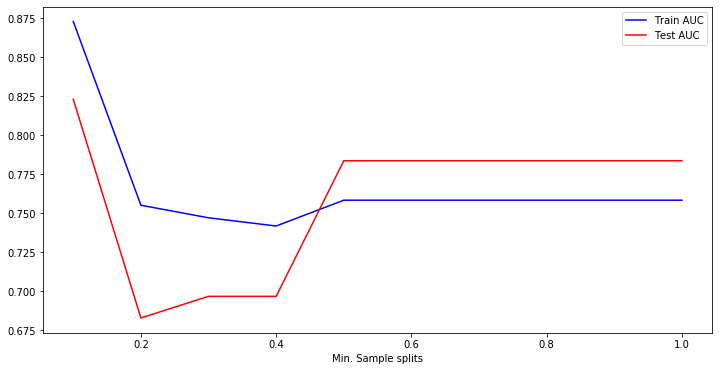

In [200]:
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

stabilization after 0.5

In [201]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results, test_results = ms.min_sample_leaf(min_samples_leafs, X_train, y_train, X_test, y_test)

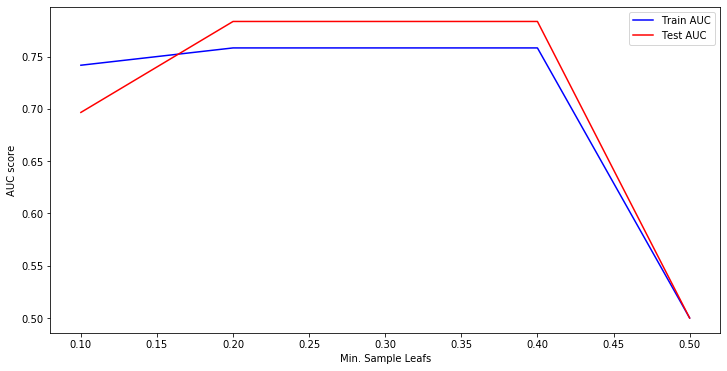

In [202]:
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

best AUC for test between 0.2-0.4

In [203]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results, test_results = ms.max_feature(X_train, y_train, X_test, y_test)

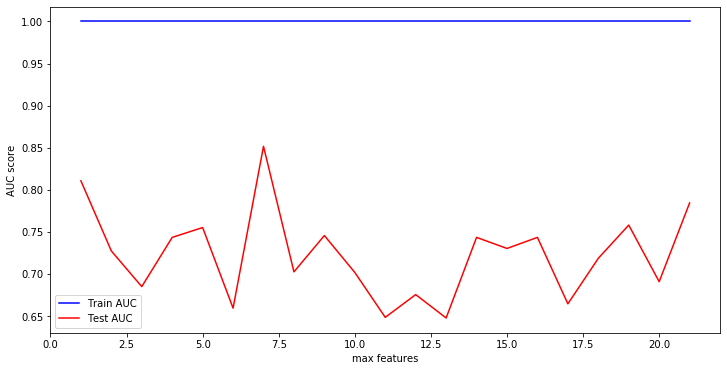

In [204]:
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

Best AUC at 7.0

In [22]:
# Train a classifier with optimal values identified above
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_curve, auc
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=7,
                           max_depth=3,
                           min_samples_split=0.5,
                           min_samples_leaf=0.3, 
                           random_state=1)
dt.fit(X_train, y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
round(roc_auc, 2)

0.66

In [206]:
y_hat_test, y_hat_train = dt.predict(X_test), dt.predict(X_train)

In [207]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.7263157894736842
Testing Precision:  0.7777777777777778
--------------------------------------------------------------------
Training Recall:  0.7263157894736842
Testing Recall:  0.7777777777777778
--------------------------------------------------------------------
Training Accuracy:  0.7625570776255708
Testing Accuracy:  0.7837837837837838
--------------------------------------------------------------------
Training F1-Score:  0.7263157894736842
Testing F1-Score:  0.7777777777777778


we did not see significant improvement to the model but in general this fine tuning will help with making small improvements, we are also rounding so this may have made improvements by a more miniscule amount. In general it is good practice to perform. But we notice if we look at the sklearn_summary, we've made significant improvements to precision and accuracy.

In [27]:
y_hat_test, y_hat_train = dt.predict_proba(X_test)[:,1], dt.predict_proba(X_train)[:,1]

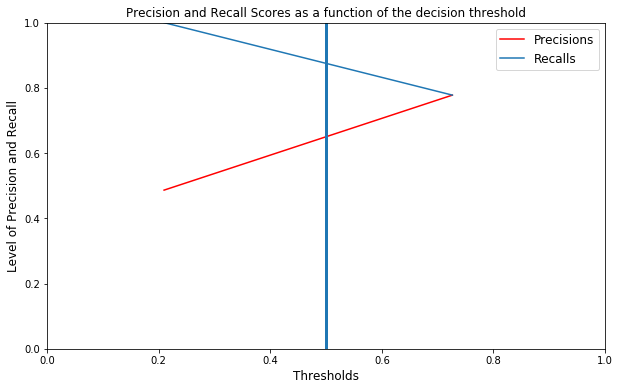

In [24]:
from sklearn.metrics import precision_recall_curve
prec, rec, tre = precision_recall_curve(y_test, y_hat_test)
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(thresholds, precisions[:-1], 'r', label='Precisions')
    plt.plot(thresholds, recalls[:-1], label='Recalls')
    plt.ylabel('Level of Precision and Recall', fontsize=12)
    plt.title('Precision and Recall Scores as a function of the decision threshold', fontsize=12)
    plt.xlabel('Thresholds', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.ylim([0,1])
    plt.xlim([0,1])
    plt.axvline(x=0.5, linewidth=3)

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [28]:
for n, i in enumerate(y_hat_test):
    if i >= 0.3:
        y_hat_test[n] = 1
    elif i < 0.3:
        y_hat_test[n] = 0  
        
for n, i in enumerate(y_hat_train):
    if i >= 0.3:
        y_hat_train[n] = 1
    elif i < 0.3:
        y_hat_train[n] = 0  

In [29]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.7263157894736842
Testing Precision:  0.7777777777777778
--------------------------------------------------------------------
Training Recall:  0.7263157894736842
Testing Recall:  0.7777777777777778
--------------------------------------------------------------------
Training Accuracy:  0.7625570776255708
Testing Accuracy:  0.7837837837837838
--------------------------------------------------------------------
Training F1-Score:  0.7263157894736842
Testing F1-Score:  0.7777777777777778


Our model using probability and choosing threshold has not really been very effective here. 

### Random Forrest

We begin by using bagging trees and then random forrest and see what are some important features. We will start with a training size of 70% to be safe (not overfit) with max_depth at 3. 

In [90]:
X_train, X_test, y_train, y_test = ms.split(df, 'target', .25)

In [91]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [92]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3), n_estimators=20)
bagged_tree.fit(X_train, y_train)
bagged_tree.score(X_train, y_train),bagged_tree.score(X_test, y_test)

(0.8904109589041096, 0.8243243243243243)

We get very good accuracy scores for both training and testing data. 

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
param_grid = {
    'max_depth': [2],
    'min_samples_leaf': [5],
    'n_estimators': [200],
    'oob_score': [True],
    'random_state': [0],
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, 
                           n_jobs = -1, verbose = 2, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train);

grid_search.best_params_
best_grid = grid_search.best_estimator_
print(best_grid.get_params())

selector = RFE(rf, step=1, verbose=3)
selector = selector.fit(X_train, y_train)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), selector.ranking_), X)))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': True, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Features sorted by their rank:
[(1, 'age'), (1, 'ca'), (1, 'chol'), (1, 'cp_asymptomatic'), (1, 'exang'), (1, 'oldpeak'), (1, 'slope_flat'), (1, 'slope_upsloping'), (1, 'thal_normal'), (1, '

In [165]:
forest = RandomForestClassifier(**best_grid.get_params())
forest.fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test)

(0.863013698630137, 0.8648648648648649)

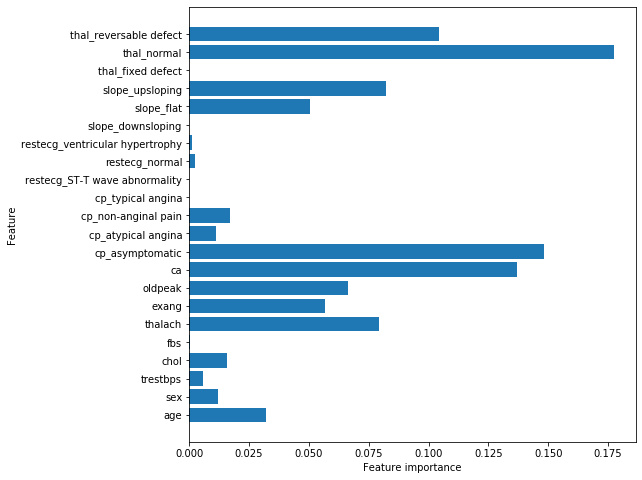

In [166]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

We see there are some features that are more important than others, important features: cp, thal, ca, oldpeak, ethalac, exang, age. 
What does this mean? as an example it is more important that a person gets checked for number of major vessels (ca) than to check for fasting blood sugar (fbs) to determine heart disease.  

If one wanted to study the trees of our random forest, we can see the important features of each tree in our random forest. However since we don't want to plot 100 trees we will just take the first 20 for the example. 

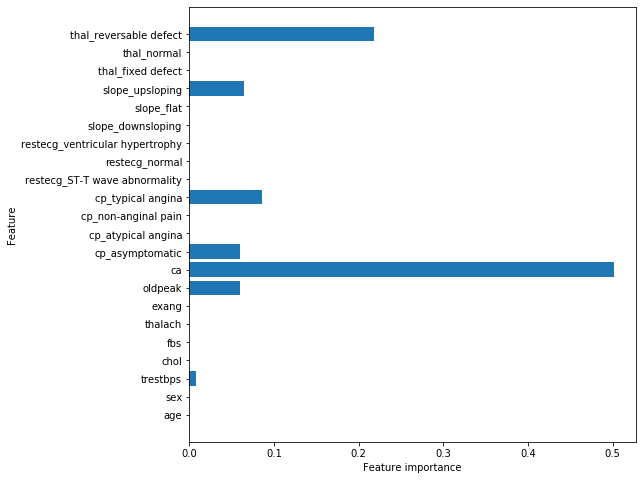

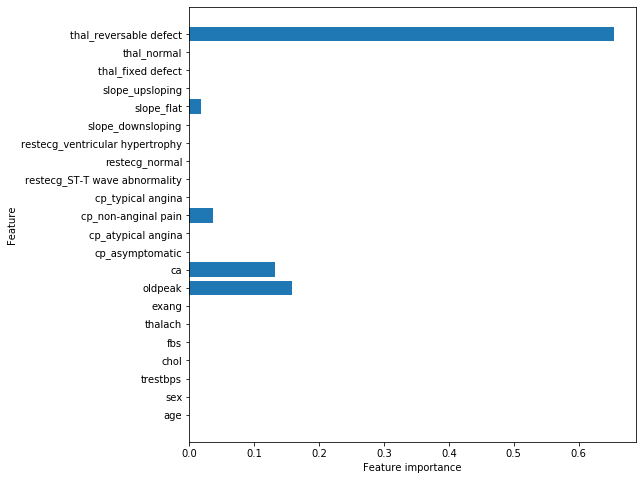

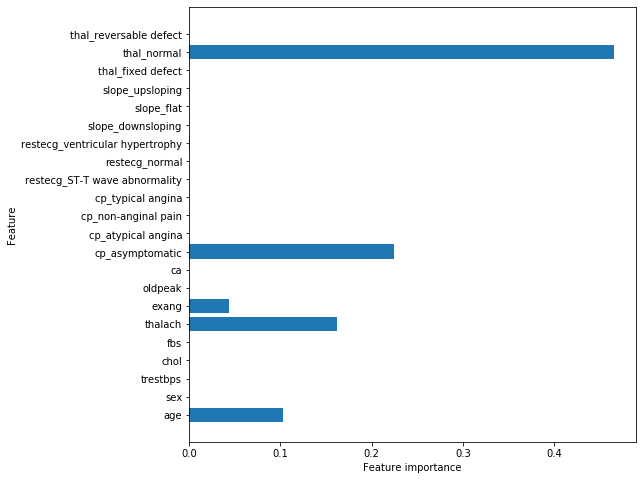

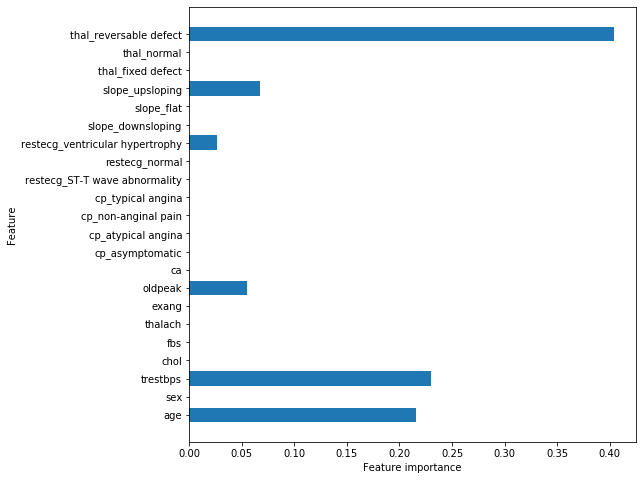

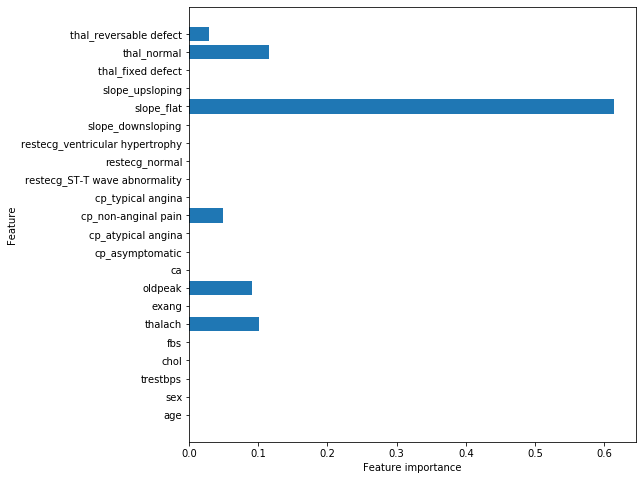

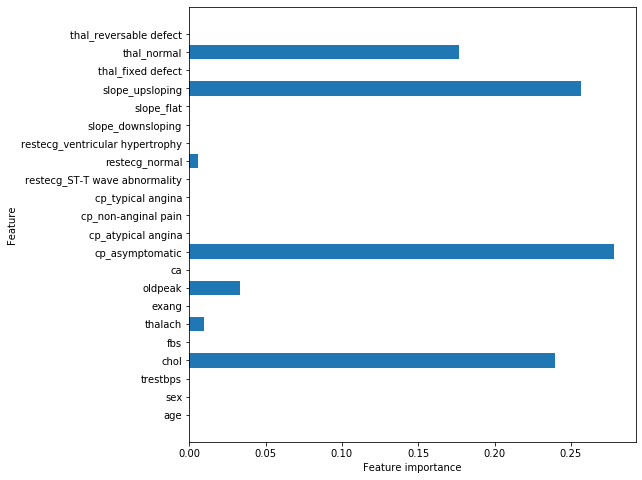

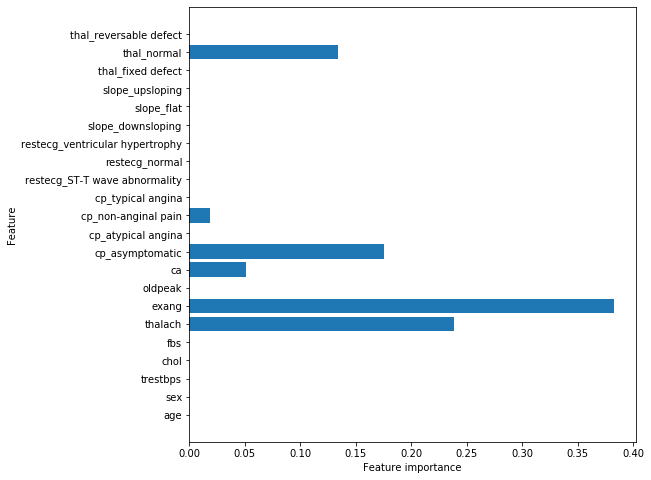

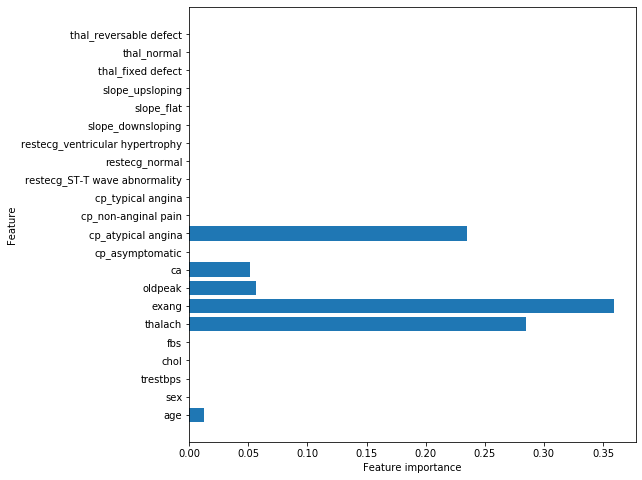

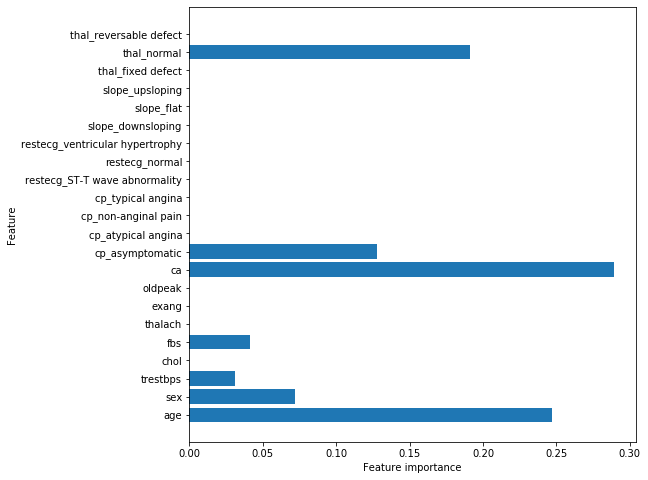

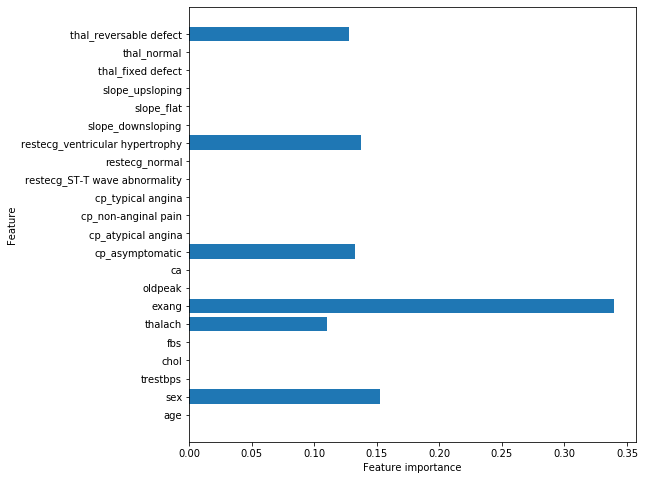

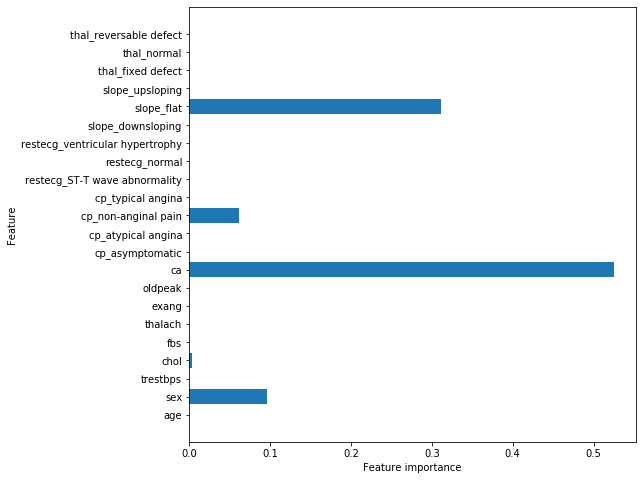

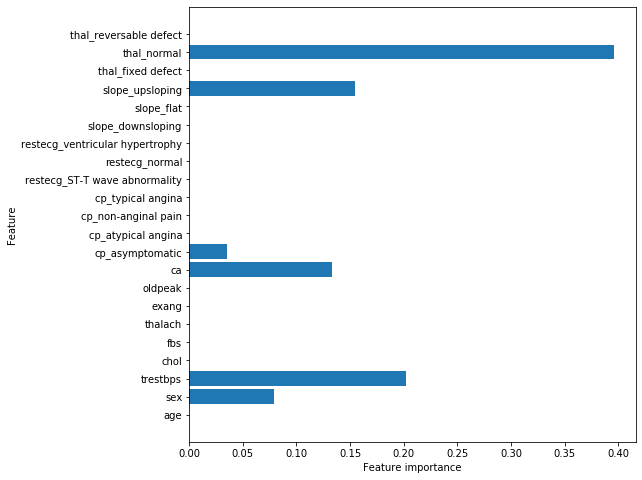

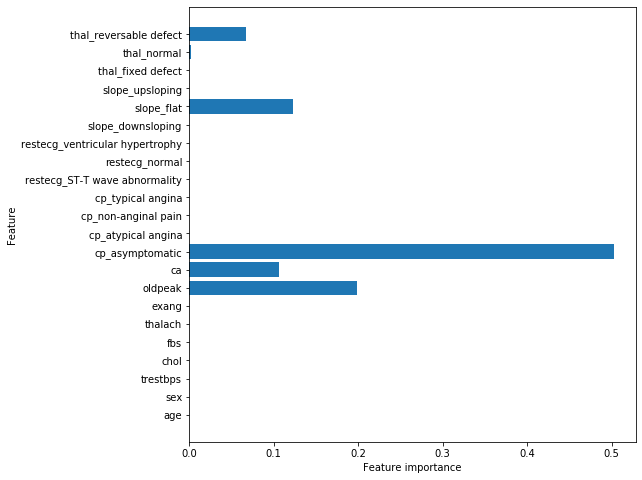

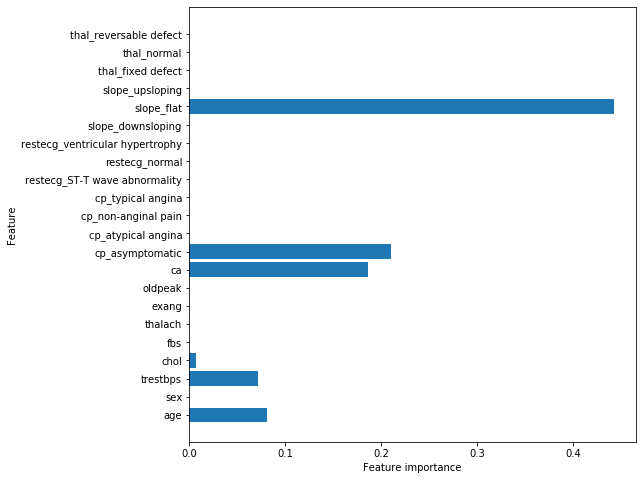

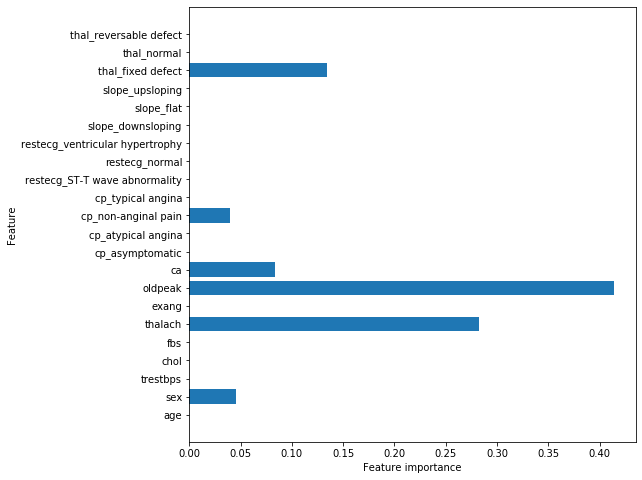

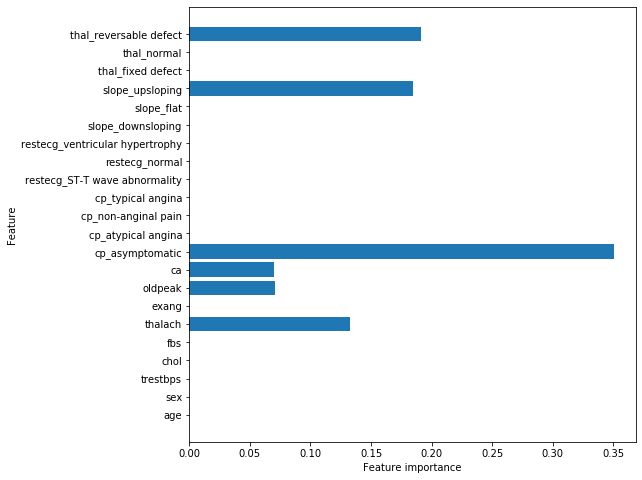

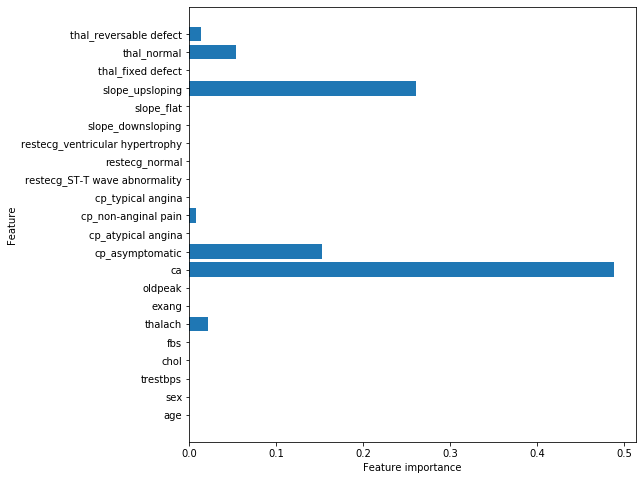

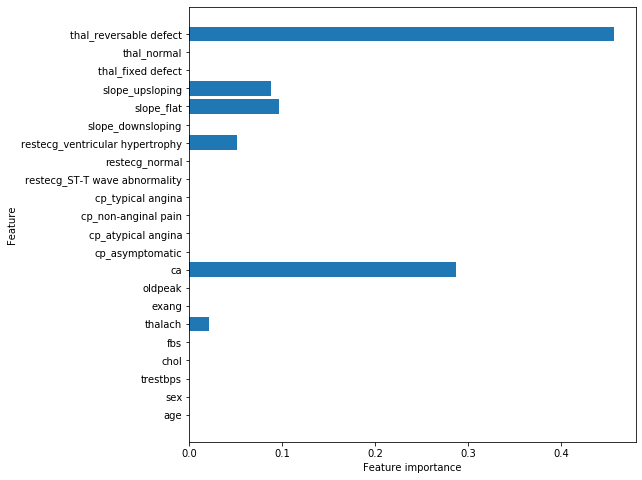

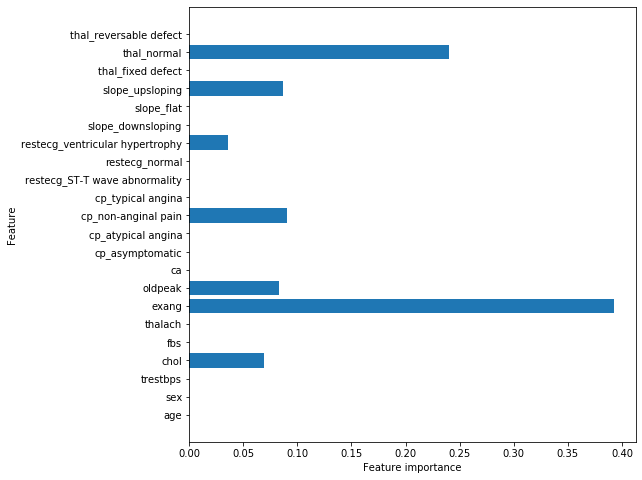

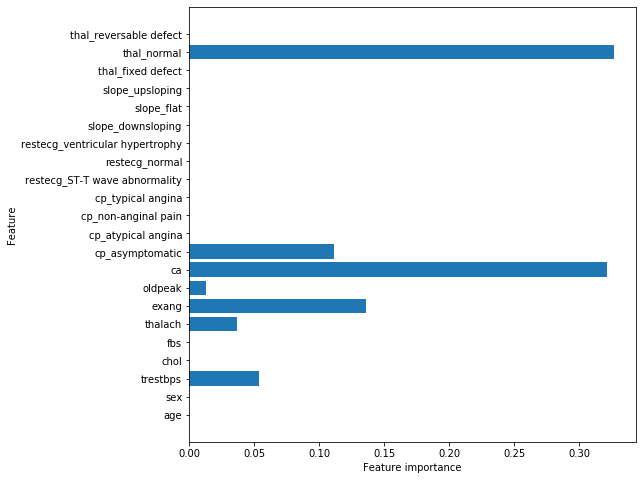

In [95]:
trees = []
for n in range(20):
    trees.append(forest.estimators_[n])
for tree in trees:    
    plot_feature_importances(tree)

In [167]:
y_hat_test, y_hat_train = forest.predict(X_test), forest.predict(X_train)

In [168]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.891566265060241
Testing Precision:  0.90625
--------------------------------------------------------------------
Training Recall:  0.7789473684210526
Testing Recall:  0.8055555555555556
--------------------------------------------------------------------
Training Accuracy:  0.863013698630137
Testing Accuracy:  0.8648648648648649
--------------------------------------------------------------------
Training F1-Score:  0.8314606741573033
Testing F1-Score:  0.8529411764705882


### PROBABILITY:
Instead of using rf.predict now we want to get rf.predict_proba this means that we will look for probability that given variables (symptoms) the PROBABILITY that the patient has heart disease. Then using the probability we can look for a best threshold. 

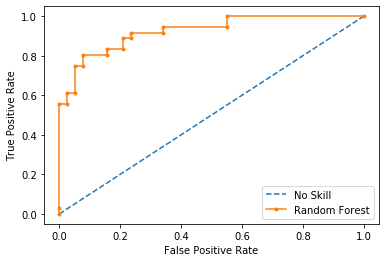

In [177]:
rf_prob = forest.predict_proba(X_test)[:,1]
ns_probs = [0 for i in range(len(y_test))]
ns_fpr, ns_tpr, i = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, i = roc_curve(y_test, rf_prob)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

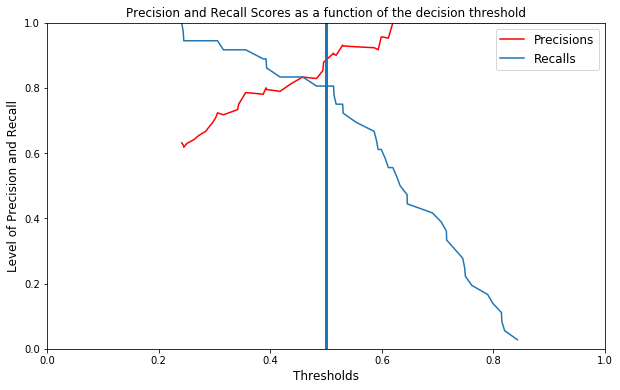

In [182]:
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [187]:
y_hat_test, y_hat_train = forest.predict_proba(X_test)[:,1], forest.predict_proba(X_train)[:,1]

In [188]:
for n, i in enumerate(y_hat_test):
    if i >= 0.5:
        y_hat_test[n] = 1
    elif i < 0.5:
        y_hat_test[n] = 0  
        
for n, i in enumerate(y_hat_train):
    if i >= 0.5:
        y_hat_train[n] = 1
    elif i < 0.5:
        y_hat_train[n] = 0  

In [189]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.891566265060241
Testing Precision:  0.90625
--------------------------------------------------------------------
Training Recall:  0.7789473684210526
Testing Recall:  0.8055555555555556
--------------------------------------------------------------------
Training Accuracy:  0.863013698630137
Testing Accuracy:  0.8648648648648649
--------------------------------------------------------------------
Training F1-Score:  0.8314606741573033
Testing F1-Score:  0.8529411764705882


## Gaussian Naive Bayes

In [108]:
X_train, X_test, y_train, y_test = ms.split(df, 'target', .25)

In [109]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_hat_test, y_hat_train = gnb.predict(X_test), gnb.predict(X_train)

In [110]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.8247422680412371
Testing Precision:  0.7894736842105263
--------------------------------------------------------------------
Training Recall:  0.8421052631578947
Testing Recall:  0.8333333333333334
--------------------------------------------------------------------
Training Accuracy:  0.8538812785388128
Testing Accuracy:  0.8108108108108109
--------------------------------------------------------------------
Training F1-Score:  0.8333333333333333
Testing F1-Score:  0.8108108108108109


In [112]:
ms.cnf_matrix(y_test, y_hat_test)

Confusion Matrix:
 [[30  8]
 [ 6 30]]


## Ensemble Average 

This portion will be done a bit more mannually, the ensemble average takes in variables and calculates the average of the predictions of every model. This will minimize the errors in models, for example if model 1 did not predict right for the i-th observation on a test data but model 2 predicted right, the average will give a better outcome for this observation than model 1. 
If model 1 however was correct in the j $\neq$ i-th but model 2 was not correct then we can see how the average can minimize some damage from each model. 

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [114]:
lg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=11)
dt = dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=7,
                           max_depth=3,
                           min_samples_split=0.5,
                           min_samples_leaf=0.3, 
                           random_state=1)
gnb = GaussianNB()

In [115]:
X_train, X_test, y_train, y_test = ms.split(df, 'target', .25)

In [118]:
y_hat_test_lg, y_hat_train_lg = lg.fit(X_train, y_train).predict(X_test), lg.fit(X_train, y_train).predict(X_train)
y_hat_test_knn, y_hat_train_knn = knn.fit(X_train, y_train).predict(X_test), knn.fit(X_train, y_train).predict(X_train)
y_hat_test_dt, y_hat_train_dt = dt.fit(X_train, y_train).predict(X_test), dt.fit(X_train, y_train).predict(X_train)
y_hat_test_gnb, y_hat_train_gnb = gnb.fit(X_train, y_train).predict(X_test), gnb.fit(X_train, y_train).predict(X_train)

In [133]:
y_hat_test = []
for i in range(len(y_hat_test_lg)):
    y_hat_test.append((y_hat_test_lg[i]+ y_hat_test_knn[i] + y_hat_test_dt[i]+ y_hat_test_gnb[i])/4)
    
for n, i in enumerate(y_hat_test):
    if i >= 0.5:
        y_hat_test[n] = 1
    elif i < 0.5:
        y_hat_test[n] = 0        

In [134]:
y_hat_train = []

for i in range(len(y_hat_train_lg)):
    y_hat_train.append((y_hat_train_lg[i]+ y_hat_train_knn[i] + y_hat_train_dt[i]+ y_hat_train_gnb[i])/4)
    
for n, i in enumerate(y_hat_train):
    if i >= 0.5:
        y_hat_train[n] = 1
    elif i < 0.5:
        y_hat_train[n] = 0 

In [136]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.84375
Testing Precision:  0.7837837837837838
--------------------------------------------------------------------
Training Recall:  0.8526315789473684
Testing Recall:  0.8055555555555556
--------------------------------------------------------------------
Training Accuracy:  0.867579908675799
Testing Accuracy:  0.7972972972972973
--------------------------------------------------------------------
Training F1-Score:  0.8481675392670157
Testing F1-Score:  0.7945205479452055


In [137]:
ms.cnf_matrix(y_test, y_hat_test)

Confusion Matrix:
 [[30  8]
 [ 7 29]]


What we can conclude from this method is that although our ensemble method gives us a decent model, it does not particularly perform better than our other models. Our log reg model was not very well using all the variables so lets try to drop that model and perform on three models.

In [144]:
y_hat_test = []
for i in range(len(y_hat_test_lg)):
    y_hat_test.append((y_hat_test_knn[i] + y_hat_test_dt[i]+ y_hat_test_gnb[i])/3)
    
for n, i in enumerate(y_hat_test):
    if i >= 0.5:
        y_hat_test[n] = 1
    elif i < 0.5:
        y_hat_test[n] = 0        

In [145]:
y_hat_train = []

for i in range(len(y_hat_train_lg)):
    y_hat_train.append((y_hat_train_knn[i] + y_hat_train_dt[i]+ y_hat_train_gnb[i])/3)
    
for n, i in enumerate(y_hat_train):
    if i >= 0.5:
        y_hat_train[n] = 1
    elif i < 0.5:
        y_hat_train[n] = 0 

In [146]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.8494623655913979
Testing Precision:  0.8529411764705882
--------------------------------------------------------------------
Training Recall:  0.8315789473684211
Testing Recall:  0.8055555555555556
--------------------------------------------------------------------
Training Accuracy:  0.863013698630137
Testing Accuracy:  0.8378378378378378
--------------------------------------------------------------------
Training F1-Score:  0.8404255319148937
Testing F1-Score:  0.8285714285714286


This has performed much better than the previous, and in fact performed better than some of our individual models by itself. Lets also try to implement random forest instead of decision trees. 

In [147]:
rf = RandomForestClassifier(n_estimators=100, max_depth= 3)
y_hat_test_rf, y_hat_train_rf = rf.fit(X_train, y_train).predict(X_test), rf.fit(X_train, y_train).predict(X_train)

In [148]:
y_hat_test = []
for i in range(len(y_hat_test_lg)):
    y_hat_test.append((y_hat_test_knn[i] + y_hat_test_rf[i]+ y_hat_test_gnb[i])/3)
    
for n, i in enumerate(y_hat_test):
    if i >= 0.5:
        y_hat_test[n] = 1
    elif i < 0.5:
        y_hat_test[n] = 0  

In [149]:
y_hat_train = []

for i in range(len(y_hat_train_lg)):
    y_hat_train.append((y_hat_train_knn[i] + y_hat_train_rf[i]+ y_hat_train_gnb[i])/3)
    
for n, i in enumerate(y_hat_train):
    if i >= 0.5:
        y_hat_train[n] = 1
    elif i < 0.5:
        y_hat_train[n] = 0 

In [150]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.898876404494382
Testing Precision:  0.8484848484848485
--------------------------------------------------------------------
Training Recall:  0.8421052631578947
Testing Recall:  0.7777777777777778
--------------------------------------------------------------------
Training Accuracy:  0.8904109589041096
Testing Accuracy:  0.8243243243243243
--------------------------------------------------------------------
Training F1-Score:  0.8695652173913043
Testing F1-Score:  0.8115942028985507


replacing decision tree with random forest did not perform as well but we did get a higher precision score at the cost of our accuracy, this may be taken into consideration as we care more about our precision score than accuracy. 


The next two models we use is xgboost and adaboost.
Note: we could have also included the two models in the ensemble but we chose not to because of time, hence we will take note of this as a possible future project. 

## XG Boost

In [36]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [37]:
xgb = XGBClassifier()

In [108]:
X_train, X_test, y_train, y_test = ms.split(df, 'target', .30)

In [117]:
y_hat_test, y_hat_train = xgb.fit(X_train, y_train).predict(X_test), xgb.fit(X_train, y_train).predict(X_train)

In [110]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  1.0
Testing Precision:  0.8285714285714286
--------------------------------------------------------------------
Training Recall:  1.0
Testing Recall:  0.6904761904761905
--------------------------------------------------------------------
Training Accuracy:  1.0
Testing Accuracy:  0.7840909090909091
--------------------------------------------------------------------
Training F1-Score:  1.0
Testing F1-Score:  0.7532467532467533


## Ada-boost 

In [120]:
from sklearn.ensemble import AdaBoostClassifier

In [121]:
ada = AdaBoostClassifier()

In [122]:
X_train, X_test, y_train, y_test = ms.split(df, 'target', .30)

In [123]:
y_hat_test, y_hat_train = ada.fit(X_train, y_train).predict(X_test), ada.fit(X_train, y_train).predict(X_train)

In [124]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.9438202247191011
Testing Precision:  0.825
--------------------------------------------------------------------
Training Recall:  0.9438202247191011
Testing Recall:  0.7857142857142857
--------------------------------------------------------------------
Training Accuracy:  0.9512195121951219
Testing Accuracy:  0.8181818181818182
--------------------------------------------------------------------
Training F1-Score:  0.9438202247191011
Testing F1-Score:  0.8048780487804876


# Conclusion

We've exeperimented with different models random forest has worked the best in classification for this dataset. We used thresholds that were best for recall since we want to be most careful about falsely identifying a patient with heart disease and therefore minimize false negatives as much as possible. We also want high accuracy so we have an overall decent model. 

## Fun from scratch
In this section we will use the models that have been written from scratch on this data set. We skip KNN since it's already been implemented and discussed in flatiron, however the file is available in the git hub link. 

## Logistic Regression

In [14]:
import logistic_regression as lr

In [15]:
df_train, df_test = lr.splitData(df, 0.75)

In [16]:
X_train = df_train.drop('target', axis =1)
y_train = df_train['target']
X_test = df_test.drop('target', axis =1)
y_test = df_test['target']

In [17]:
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

In [20]:
w,b = lr.weightInitialization(22)
coeff, gradient, costs = lr.model_fit(w, b, X_train, y_train)

In [21]:
w = coeff['w']
b = coeff['b']

In [23]:
y_hat_test = lr.log_reg_predict(X_test, len(y_test), w, b)
y_hat_train = lr.log_reg_predict(X_train, len(y_train), w, b)

In [24]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.8617021276595744
Testing Precision:  0.8387096774193549
--------------------------------------------------------------------
Training Recall:  0.8350515463917526
Testing Recall:  0.7647058823529411
--------------------------------------------------------------------
Training Accuracy:  0.8681818181818182
Testing Accuracy:  0.821917808219178
--------------------------------------------------------------------
Training F1-Score:  0.8481675392670158
Testing F1-Score:  0.7999999999999999


## Decision Trees

In [193]:
df_train, df_test = lr.splitData(df, 0.75)

In [194]:
X_train = df_train.drop('target', axis =1)
y_train = df_train['target']

In [195]:
training_data = X_train.values.tolist()

In [196]:
for i in range(len(training_data)):
    training_data[i].append(y_train.iloc[i])

In [197]:
import decision_trees as dt

In [198]:
my_tree = dt.build_tree(training_data)

In [199]:
dt.print_tree(my_tree)

----------------------------------------
Is var_col index 20 >= 1.0 ?
----------------------------------------
True:
----------------------------------------
  Is var_col index 7 >= 0.8181818181818181 ?
----------------------------------------
  True:
    Predict {1: 2}
----------------------------------------
  False:
----------------------------------------
    Is var_col index 9 >= 1.0 ?
----------------------------------------
    True:
----------------------------------------
      Is var_col index 0 >= 0.685690653432589 ?
----------------------------------------
      True:
----------------------------------------
        Is var_col index 6 >= 1.0 ?
----------------------------------------
        True:
          Predict {1: 6}
----------------------------------------
        False:
----------------------------------------
          Is var_col index 8 >= 3.0 ?
----------------------------------------
          True:
            Predict {1: 2}
-------------------------------------

In [200]:
X_test = df_test.drop('target', axis =1)
y_test = df_test['target']

In [201]:
testing_data = X_test.values.tolist()

In [202]:
for i in range(len(testing_data)):
    testing_data[i].append(y_test.iloc[i])

In [203]:
y_hat = []
for row in testing_data:
    y_hat.append(dt.print_leaf(row, my_tree))
    #print(row[-1], dt.print_leaf(row, my_tree))

In [204]:
y_hat_test = []
for pred in y_hat:
    for key in pred.keys():
        y_hat_test.append(key)

In [205]:
dt.percentage_correct(list(y_test), y_hat_test)

84.93150684931507

In [206]:
y_hat_tr = []
for row in training_data:
    y_hat_tr.append(dt.print_leaf(row, my_tree))
    #print(row[-1], dt.print_leaf(row, my_tree))

In [207]:
y_hat_train = []
for pred in y_hat_tr:
    for key in pred.keys():
        y_hat_train.append(key)

In [208]:
dt.percentage_correct(list(y_train), y_hat_train)

100.0

In [209]:
ms.sklearn_summary(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  1.0
Testing Precision:  0.8648648648648649
--------------------------------------------------------------------
Training Recall:  1.0
Testing Recall:  0.8421052631578947
--------------------------------------------------------------------
Training Accuracy:  1.0
Testing Accuracy:  0.8493150684931506
--------------------------------------------------------------------
Training F1-Score:  1.0
Testing F1-Score:  0.8533333333333334
